In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("TV_Final.csv")

In [3]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,Acer,Ultra HD LED,50,34999,44990,Android,3.6
1,Acer,Ultra HD LED,58,38999,59990,Android,4.0
2,Acer,Ultra HD LED,55,39999,54990,Android,3.8
3,Acer,Ultra HD LED,70,69999,99990,Android,4.3
4,Acer,Ultra HD LED,43,34990,34990,Android,3.8


In [54]:
tab = df["Resolution"].str.split(" ").str[0]
tab

0      Ultra
1      Ultra
2      Ultra
3      Ultra
4      Ultra
       ...  
907    Ultra
908    Ultra
909     Full
910     Full
911     Full
Name: Resolution, Length: 912, dtype: object

In [23]:
tele = df["Operating System"].fillna(method="ffill", axis=0)

In [24]:
television = df.copy()

In [25]:
television["Operating System"] = tele

In [26]:
television.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System      0
Rating              220
dtype: int64

In [27]:
television.drop(["Selling Price", "Rating"], axis=1, inplace=True)

In [28]:
television.head(3)

,Brand,Resolution,Size,Original Price,Operating System
0,Acer,Ultra HD LED,50,44990,Android
1,Acer,Ultra HD LED,58,59990,Android
2,Acer,Ultra HD LED,55,54990,Android


In [29]:
X = television.drop(["Original Price"], axis=1)
y = television["Original Price"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=13)

In [37]:
regressor = CatBoostRegressor()

In [38]:
cat_feat = ["Brand", "Resolution", "Operating System"]

In [ ]:
regressor.fit(X_train, y_train, cat_features=cat_feat)

In [42]:
regressor.score(X_train, y_train)

0.805351344852352

In [43]:
pred_y = regressor.predict(X_test)

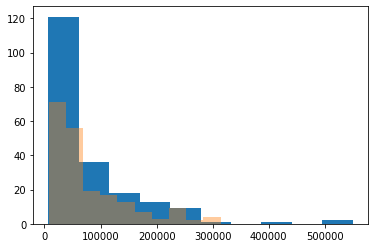

In [45]:
plt.hist(y_test)
plt.hist(pred_y, alpha=0.4)
plt.show();

In [46]:
regressor.predict(["Acer", "HD LED", "32", "Android"])

21307.594791948322

In [47]:
regressor.predict(["Candes", "HD LED", "32", "Android"])

21682.13146972903

In [48]:
regressor.predict(["Acer", "QLED Ultra HD", "55", "Android"])

82918.81584958515